In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

In [2]:
# Data Preparation
# unzip the dataset
with zipfile.ZipFile('Downloads/netflix_data.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset 
df = pd.read_csv('Downloads/netflix_data.csv', low_memory=False)
df.to_csv('Netflix_shows_movies_v2.csv', index=False)


In [ ]:
# Data Cleaning: Address missing values
# Handle missing values 
print(df.dtypes) # Identify nnn-numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].astype('float64')

# Filling the missing values with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify the mssing values are filled correctly
print(df.isnull().sum())

# Statistical analysis using correlaton matric
numeric_df = df.select_dtypes(include=['number']) # Numeric columns selection
correlation_matrix = numeric_df.corr()
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()  # Correlation calculation

# Visualize the oorrelation matrix
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [12]:
# Data Exploration
print(df.describe())
print(df.info())
print(df.head())
print(df.columns)

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object

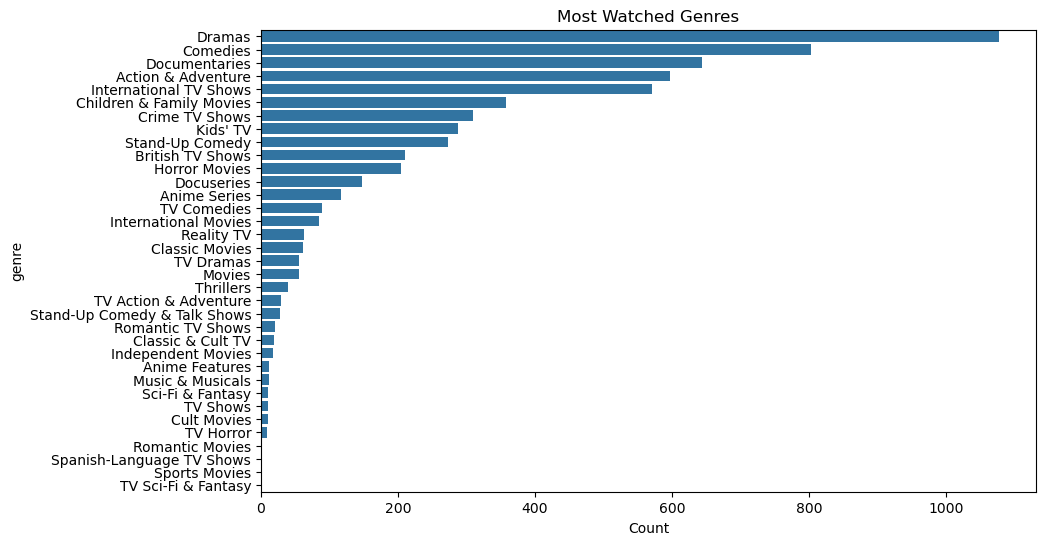

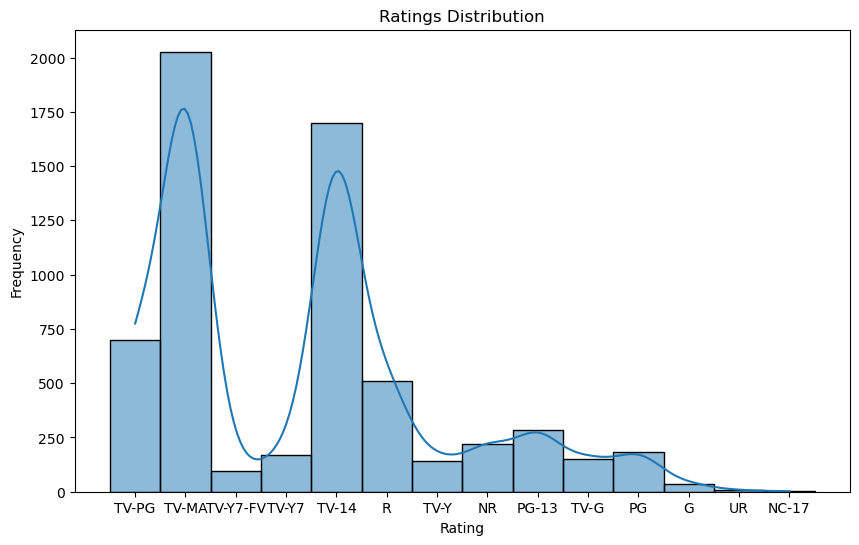

In [16]:
# Data Visualization
# Create a new column 'genre'
df['genre'] = df['listed_in'].str.split(',').str[0]

# Data Visualization
# Most watched genres
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Most Watched Genres')
plt.xlabel('Count')

# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Export a sample dataset for R integration
df.to_csv('Netflix_shows_movies_sample_v2.csv', index=False)

In [19]:
# Create a zip file for submission
import zipfile

# Create a zip file for submission
with zipfile.ZipFile('BAN6420_Mil1_NetflixAnalysis.zip', 'w') as zipf:
    zipf.write('Netflix_shows_movies_v2.csv')
    zipf.write('Netflix_shows_movies_sample_v2.csv')